<a href="https://colab.research.google.com/github/ayushanand18/pyobis/blob/bio-mapping/notebooks/biodiversity_mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Biodiversity mapping

Search for the order Scleractinia and extract all records. We will use `pyobis` to fetch data and then visualize.

Searching the order [Scleractinia](https://www.marinespecies.org/aphia.php?p=taxdetails&id=1363) and drill down to all species.

AphiaID 1363 (urn:lsid:marinespecies.org:taxname:1363)

## installing pyobis

In [2]:
try:
  import pyobis
except:
  %pip -q install pyobis
  import pyobis

## importing modules

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from scipy import stats

In [4]:
try:
  import geopandas as gpd
except:
  %pip -q install geopandas
  import geopandas as gpd

In [5]:
from pyobis.occurrences import OccQuery

### importing other modules
The below modules will be used when querying through the dynamic map (utilising widgets).

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## grabbing the data

Since our analysis will be highly dependent on the depth parameter, we will choose only non NaN values.

In [6]:
occ = OccQuery()

Let us also define the specific range of depth we are interested in.

In [7]:
STARTDEPTH = 0
ENDDEPTH = 30

In [8]:
# it returns a pandas DataFrame object
df = occ.search(taxonid=1363, startdepth=STARTDEPTH, enddepth=ENDDEPTH)


Fetched 526647 records.


In [9]:
# let's see what we got
df.head()

,brackish,date_year,scientificNameID,year,scientificName,coordinateUncertaintyInMeters,absence,dropped,genusid,aphiaID,...,forma,formaid,materialSampleID,taxonConceptID,infraspecificEpithet,recordedByID,sex,establishmentMeans,variety,varietyid
0,False,2009.0,urn:lsid:marinespecies.org:taxname:206938,2009,Pocillopora,100.0,False,False,206938.0,206938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,2008.0,urn:lsid:marinespecies.org:taxname:207470,2008,Leptastrea purpurea,100.0,False,False,204278.0,207470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,2000.0,urn:lsid:marinespecies.org:taxname:291119,2000,Stephanocoenia intersepta,NaN,False,False,267860.0,291119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,2009.0,urn:lsid:marinespecies.org:taxname:291119,2009,Stephanocoenia intersepta,NaN,False,False,267860.0,291119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,2010.0,urn:lsid:marinespecies.org:taxname:207225,2010,Porites lobata,100.0,False,False,206485.0,207225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Our To-do
+ [ ] an year distribution analysis (kde+)
+ [ ] a world plot of based on point density
+ [ ] a world plot with s

## analysis

### year-wise distribution

In [10]:
# setting up seaborn
sns.set(style="darkgrid", rc={'figure.figsize':(25,8)})
# getting the basemap
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

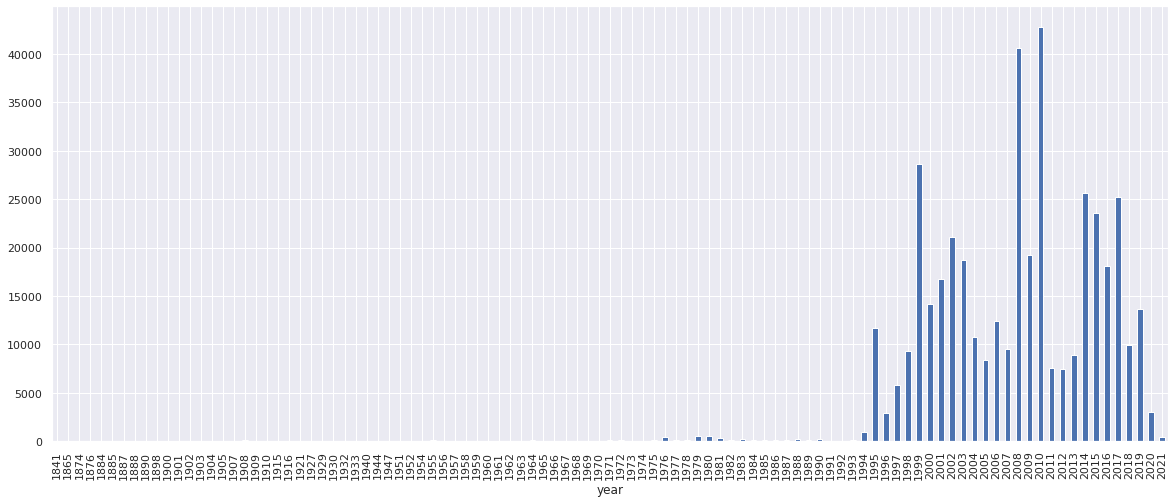

In [19]:
ax = df.groupby("year").date_mid.count().plot.bar(figsize = (20,8))
density = stats.kde.gaussian_kde(df.groupby("year").date_mid.count())(df.groupby("year").date_mid.count())
x = np.linspace(df[df.year.notnull()].year.astype(int).min(), df[df.year.notnull()].year.astype(int).max(), len(df.year.unique())-1)
plt.plot(x,density);

### based on point density

In [ ]:
values = np.vstack([df["decimalLongitude"],df["decimalLatitude"]])
kernel = stats.gaussian_kde(values)(values)
sns.scatterplot(data=df, x="decimalLongitude", y="decimalLatitude", c=kernel, cmap="coolwarm", linewidth=0)

### with latitude and longitude stacked side-by-side

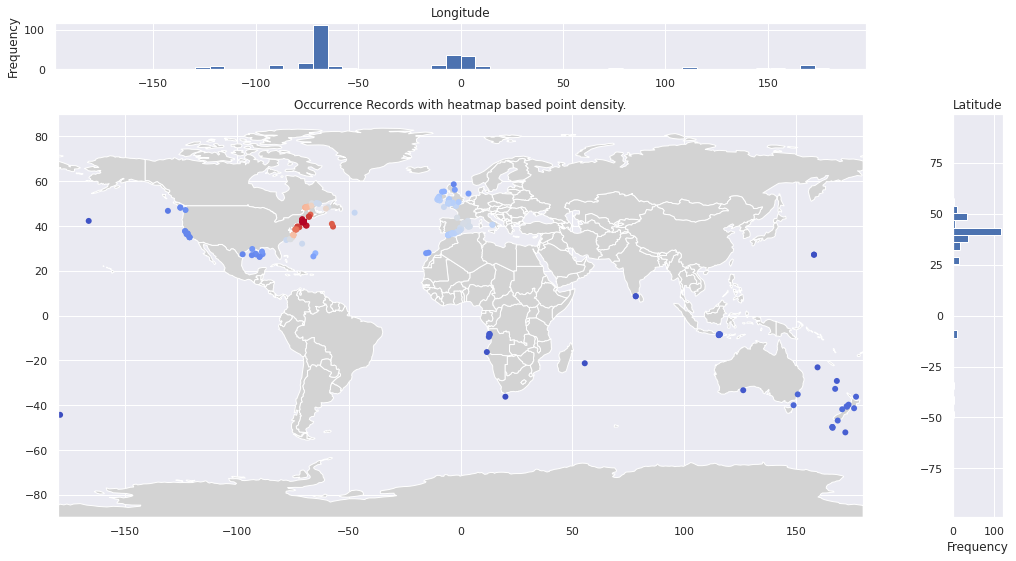

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(17,9.1), gridspec_kw={'width_ratios': [16, 1], 'height_ratios': [1, 8.7]})
df["decimalLongitude"].astype(int).plot.hist(ax=axes[0][0], bins=50, range=(-180, 180))
axes[0][0].set_title("Longitude")

axes[0][1].set_facecolor('white')
axes[0][1].tick_params(left=False, bottom=False, labelbottom=False, labelleft=False)

countries.plot(color="lightgrey", figsize=(16, 8.4), ax = axes[1][0])
values = np.vstack([df["decimalLongitude"],df["decimalLatitude"]])
kernel = stats.gaussian_kde(values)(values)
sns.scatterplot(data=df, x="decimalLongitude", y="decimalLatitude", c=kernel, cmap="coolwarm", linewidth=0, ax=axes[1][0])
axes[1][0].set_xlim(-180,180)
axes[1][0].set_ylim(-90, 90)
axes[1][0].set_title("Occurrence Records with heatmap based point density.")
axes[1][0].set_xlabel("")
axes[1][0].set_ylabel("")
df["decimalLatitude"].astype(int).plot.hist(orientation='horizontal', ax=axes[1][1], bins=50, range=(-90, 90))

axes[1][1].set_title("Latitude")
plt.show()

--------------------
--------------------

## Dynamic Plot

In [ ]:
# defining areas of outputs
map_out = widgets.Output(layout={'border': '1px solid black', 'padding': '0 4px 15px 4px'})
map_out.append_stdout('map output\n')

graph_out = widgets.Output(layout={'border': '1px solid black', 'padding': '0 0 15px 4px'})
graph_out.append_stdout('graph output\n')

zoom_out = widgets.Output(layout={'border': '1px solid black', 'padding': '0 4px 15px 0'})
zoom_out.append_stdout('set a (lat, lon) to view zoom view\n')

In [ ]:
# setting the buttons and fields
taxonInput = widgets.IntText(description="Enter Taxon ID", value = 127405)
taxonButton = widgets.Button(description="Fetch Data")
graph = widgets.Button(description="Show graph")
map = widgets.Button(description="Show map")
zoom_button = widgets.Button(description="Open zoomed")
ilats = widgets.IntText(description="Lat.")
ilons = widgets.IntText(description="Long.")
zoom = widgets.IntText(description="Zoom by:", value=20)

In [ ]:
# defining click events
def on_taxon_updated(b):
  req = occ.search(taxonid = taxonInput.value, startdepth = -2000)
  df = pd.DataFrame(req["results"])

@map_out.capture()
def on_map_clicked(b):
  map_out.clear_output()
  countries.plot(color="grey", figsize=(11,6))
  plt.title("records")
  wmap = plt.scatter(data=df, x="decimalLongitude", y="decimalLatitude", c=df["depth"], cmap="coolwarm")
  plt.xlabel("")
  plt.ylabel("")
  plt.colorbar(wmap)
  plt.show()

@zoom_out.capture()
def on_zoom_clicked(b):
  zoom_out.clear_output()
  ax = countries.plot(color="lightgrey")
  plt.scatter(data=df, x="decimalLongitude", y="decimalLatitude", c=df["depth"], cmap="coolwarm")
  plt.rc('figure',figsize=(5,5))
  plt.xlabel("")
  plt.ylabel("")
  plt.title(f"zoomed around {ilons.value, ilats.value}")
  ax.set_xlim(ilons.value-zoom.value,ilons.value+zoom.value)
  ax.set_ylim(ilats.value-zoom.value,ilats.value+zoom.value)
  plt.show()

@graph_out.capture()
def on_graph_clicked(b):
  graph_out.clear_output()
  plt.figure(figsize=(5,2.2))
  plt.title("records histogram");
  sns.histplot(df["decimalLatitude"].astype(int), kde=True)
  plt.figure(figsize=(5,2.2))
  sns.histplot(df["decimalLongitude"].astype(int), kde=True)
  graph_out.append_stdout(plt.show())

taxonButton.on_click(on_taxon_updated)
graph.on_click(on_graph_clicked)
map.on_click(on_map_clicked)
zoom_button.on_click(on_zoom_clicked)

Let's see the widgets.

In [ ]:
widgets.VBox([
    widgets.HBox([
        taxonInput, taxonButton
    ]),
    widgets.VBox([
      widgets.HBox([zoom_out, map_out, graph_out]),
        widgets.VBox([
          widgets.HBox([ilons,ilats, zoom]),
            widgets.HBox([map, zoom_button, graph])
      ])
  ])
])